In [1]:
import shap
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
X_display, X

(        Age          Workclass  Education-Num       Marital Status  \
 0      39.0          State-gov           13.0        Never-married   
 1      50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
 2      38.0            Private            9.0             Divorced   
 3      53.0            Private            7.0   Married-civ-spouse   
 4      28.0            Private           13.0   Married-civ-spouse   
 ...     ...                ...            ...                  ...   
 32556  27.0            Private           12.0   Married-civ-spouse   
 32557  40.0            Private            9.0   Married-civ-spouse   
 32558  58.0            Private            9.0              Widowed   
 32559  22.0            Private            9.0        Never-married   
 32560  52.0       Self-emp-inc            9.0   Married-civ-spouse   
 
                Occupation    Relationship    Race      Sex  Capital Gain  \
 0            Adm-clerical   Not-in-family   White     Male        21

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
xgb = XGBClassifier(max_depth=3, n_estimators=1000, eta=0.1, reg_alpha=0.5)
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.887093058968059, 0.8765545831414094)

In [6]:
explainer = shap.Explainer(model=xgb)
explanation = explainer(X_test)
shap_values = explanation.values
explanation

.values =
array([[ 4.42822538e-02,  6.14688098e-02, -1.04825273e-01, ...,
        -9.61489230e-02, -1.83564961e-01,  8.65025166e-03],
       [ 6.67810142e-01,  4.93298054e-01,  5.56441247e-01, ...,
        -4.97669205e-02,  8.25428009e-01,  1.12723559e-02],
       [-1.96976089e+00,  3.43849580e-03, -5.72322793e-02, ...,
        -8.56718644e-02, -2.55625457e-01,  4.24209330e-03],
       ...,
       [-4.19424963e+00, -6.75482005e-02, -3.87006290e-02, ...,
        -5.69976717e-02, -1.58234847e+00, -7.54650508e-04],
       [-1.73683572e+00, -1.20867744e-01, -4.63961393e-01, ...,
        -6.45508245e-02, -1.93727747e-01, -7.68136024e-01],
       [ 5.09202659e-01,  5.34158647e-02,  5.20822499e-03, ...,
        -8.40079710e-02, -5.30806184e-02,  1.96739770e-02]], dtype=float32)

.base_values =
array([-1.1866056, -1.1866056, -1.1866056, ..., -1.1866056, -1.1866056,
       -1.1866056], dtype=float32)

.data =
array([[ 39.,   4.,  10., ..., 625.,  40.,  39.],
       [ 48.,   1.,  13., ...,   0.,

In [7]:
select = range(20)
features = X_test.iloc[select]
features_display = X_display.iloc[features.index]

In [10]:
shap_values = explanation.values
expected_values = explanation.base_values
shap_interaction_values = explainer.shap_interaction_values(X_test)
shap_values.shape, expected_values.shape, shap_interaction_values.shape

((6513, 12), (6513,), (6513, 12, 12))

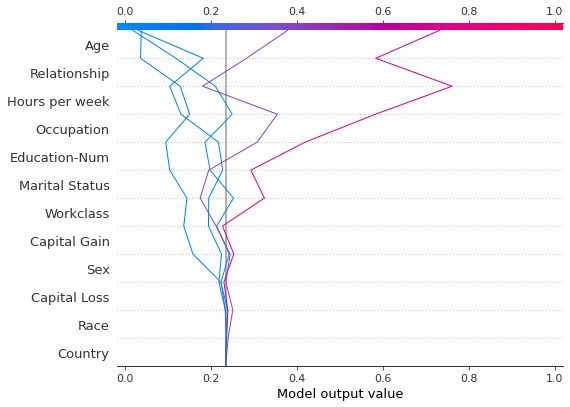

In [29]:
shap.decision_plot(base_value=expected_values[0], shap_values=shap_values[0:5, :], features=X_test.iloc[0:5, :], link='logit')

In [37]:
sample_indices = X_test.index.tolist()
legend_labels = [f'Sample {i}' for i in sample_indices]
legend_labels[0:5]
y_pred = xgb.predict(X_test)
misclassified = np.argwhere(y_pred != y_test)
misclassified[0][0]

12

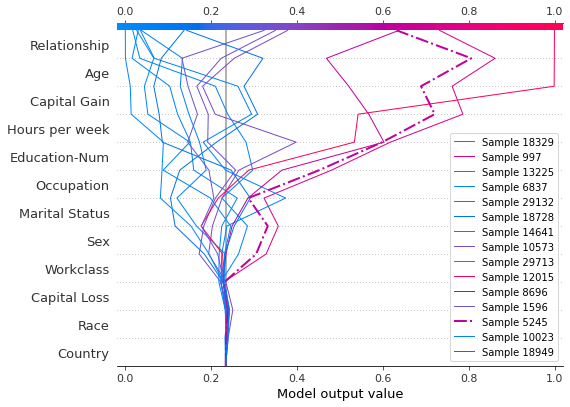

In [39]:
shap.decision_plot(expected_values[0], shap_values[0:15, :], features=X_test.iloc[0:15, :],
                   legend_labels=legend_labels[0:15], highlight=misclassified[0][0], link='logit')

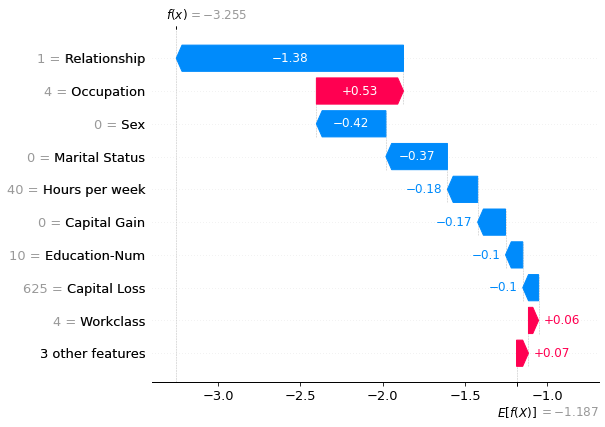

In [45]:
shap.waterfall_plot(explanation[0])